# MNIST_DEMO

### Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Collect data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

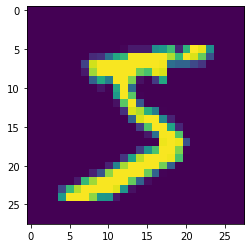

In [3]:
plt.imshow(x_train[0])

In [ ]:
x_train[0]

In [ ]:
x_train.shape

In [4]:
# Normalizing dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

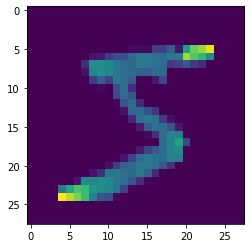

In [5]:
plt.imshow(x_train[0])

### Build model

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # input layer
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 54us/step - loss: 0.4844 - acc: 0.8747 - val_loss: 0.2835 - val_acc: 0.9178
Epoch 2/10
42000/42000 [==============================] - 2s 45us/step - loss: 0.2476 - acc: 0.9287 - val_loss: 0.2373 - val_acc: 0.9302
Epoch 3/10
42000/42000 [==============================] - 2s 46us/step - loss: 0.2042 - acc: 0.9420 - val_loss: 0.2036 - val_acc: 0.9415
Epoch 4/10
42000/42000 [==============================] - 2s 45us/step - loss: 0.1722 - acc: 0.9501 - val_loss: 0.1873 - val_acc: 0.9449
Epoch 5/10
42000/42000 [==============================] - 2s 45us/step - loss: 0.1484 - acc: 0.9564 - val_loss: 0.1713 - val_acc: 0.9501
Epoch 6/10
42000/42000 [==============================] - 2s 50us/step - loss: 0.1301 - acc: 0.9619 - val_loss: 0.1628 - val_acc: 0.9514
Epoch 7/10
42000/42000 [==============================] - 2s 54us/step - loss: 0.1165 - acc: 0.9661 - val_loss: 0.1561 - val_acc

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Visulizing training process

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

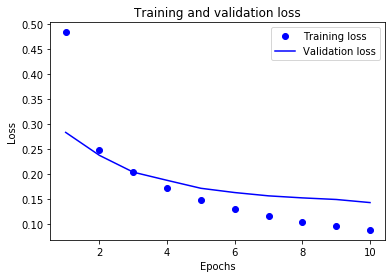

In [14]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Test

In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 21us/step


### Prediction

In [16]:
predictions = model.predict([x_test])

In [17]:
print(np.argmax(predictions[100]))

6


In [18]:
predictions[100]

array([3.2106243e-04, 1.9680701e-05, 1.5698840e-04, 3.2938879e-06,
       6.7155750e-05, 1.8032516e-06, 9.9941337e-01, 7.6425185e-06,
       7.9038646e-06, 9.8252349e-07], dtype=float32)

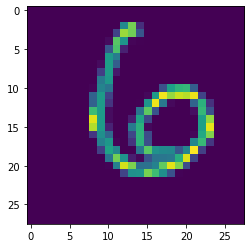

In [19]:
plt.imshow(x_test[100])

In [20]:
y_test[100]

6